## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data preparation

In [2]:
df = pd.read_csv('../data/music_genre.csv')

# Remove unnecessary features.
df = df.drop(columns=['instance_id', 'track_name', 'obtained_date'])

# Drop missing values.
df = df[df['duration_ms'] != -1]
df = df[df['loudness'] != 0]
df = df.replace('?', np.nan)
df = df.dropna()

# Convert tempo into appropriate type.
df.tempo = df.tempo.astype(float)

# Remove artist_name (because of empty_field values).
df_withartist = df.copy() # TODO: Check whether all tracks by the same artist have the same genre?
df = df.drop(columns=['artist_name'])

print(df_withartist.shape)
print(df.shape)

df.head()

(40559, 15)
(40559, 14)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic


# Features relationships

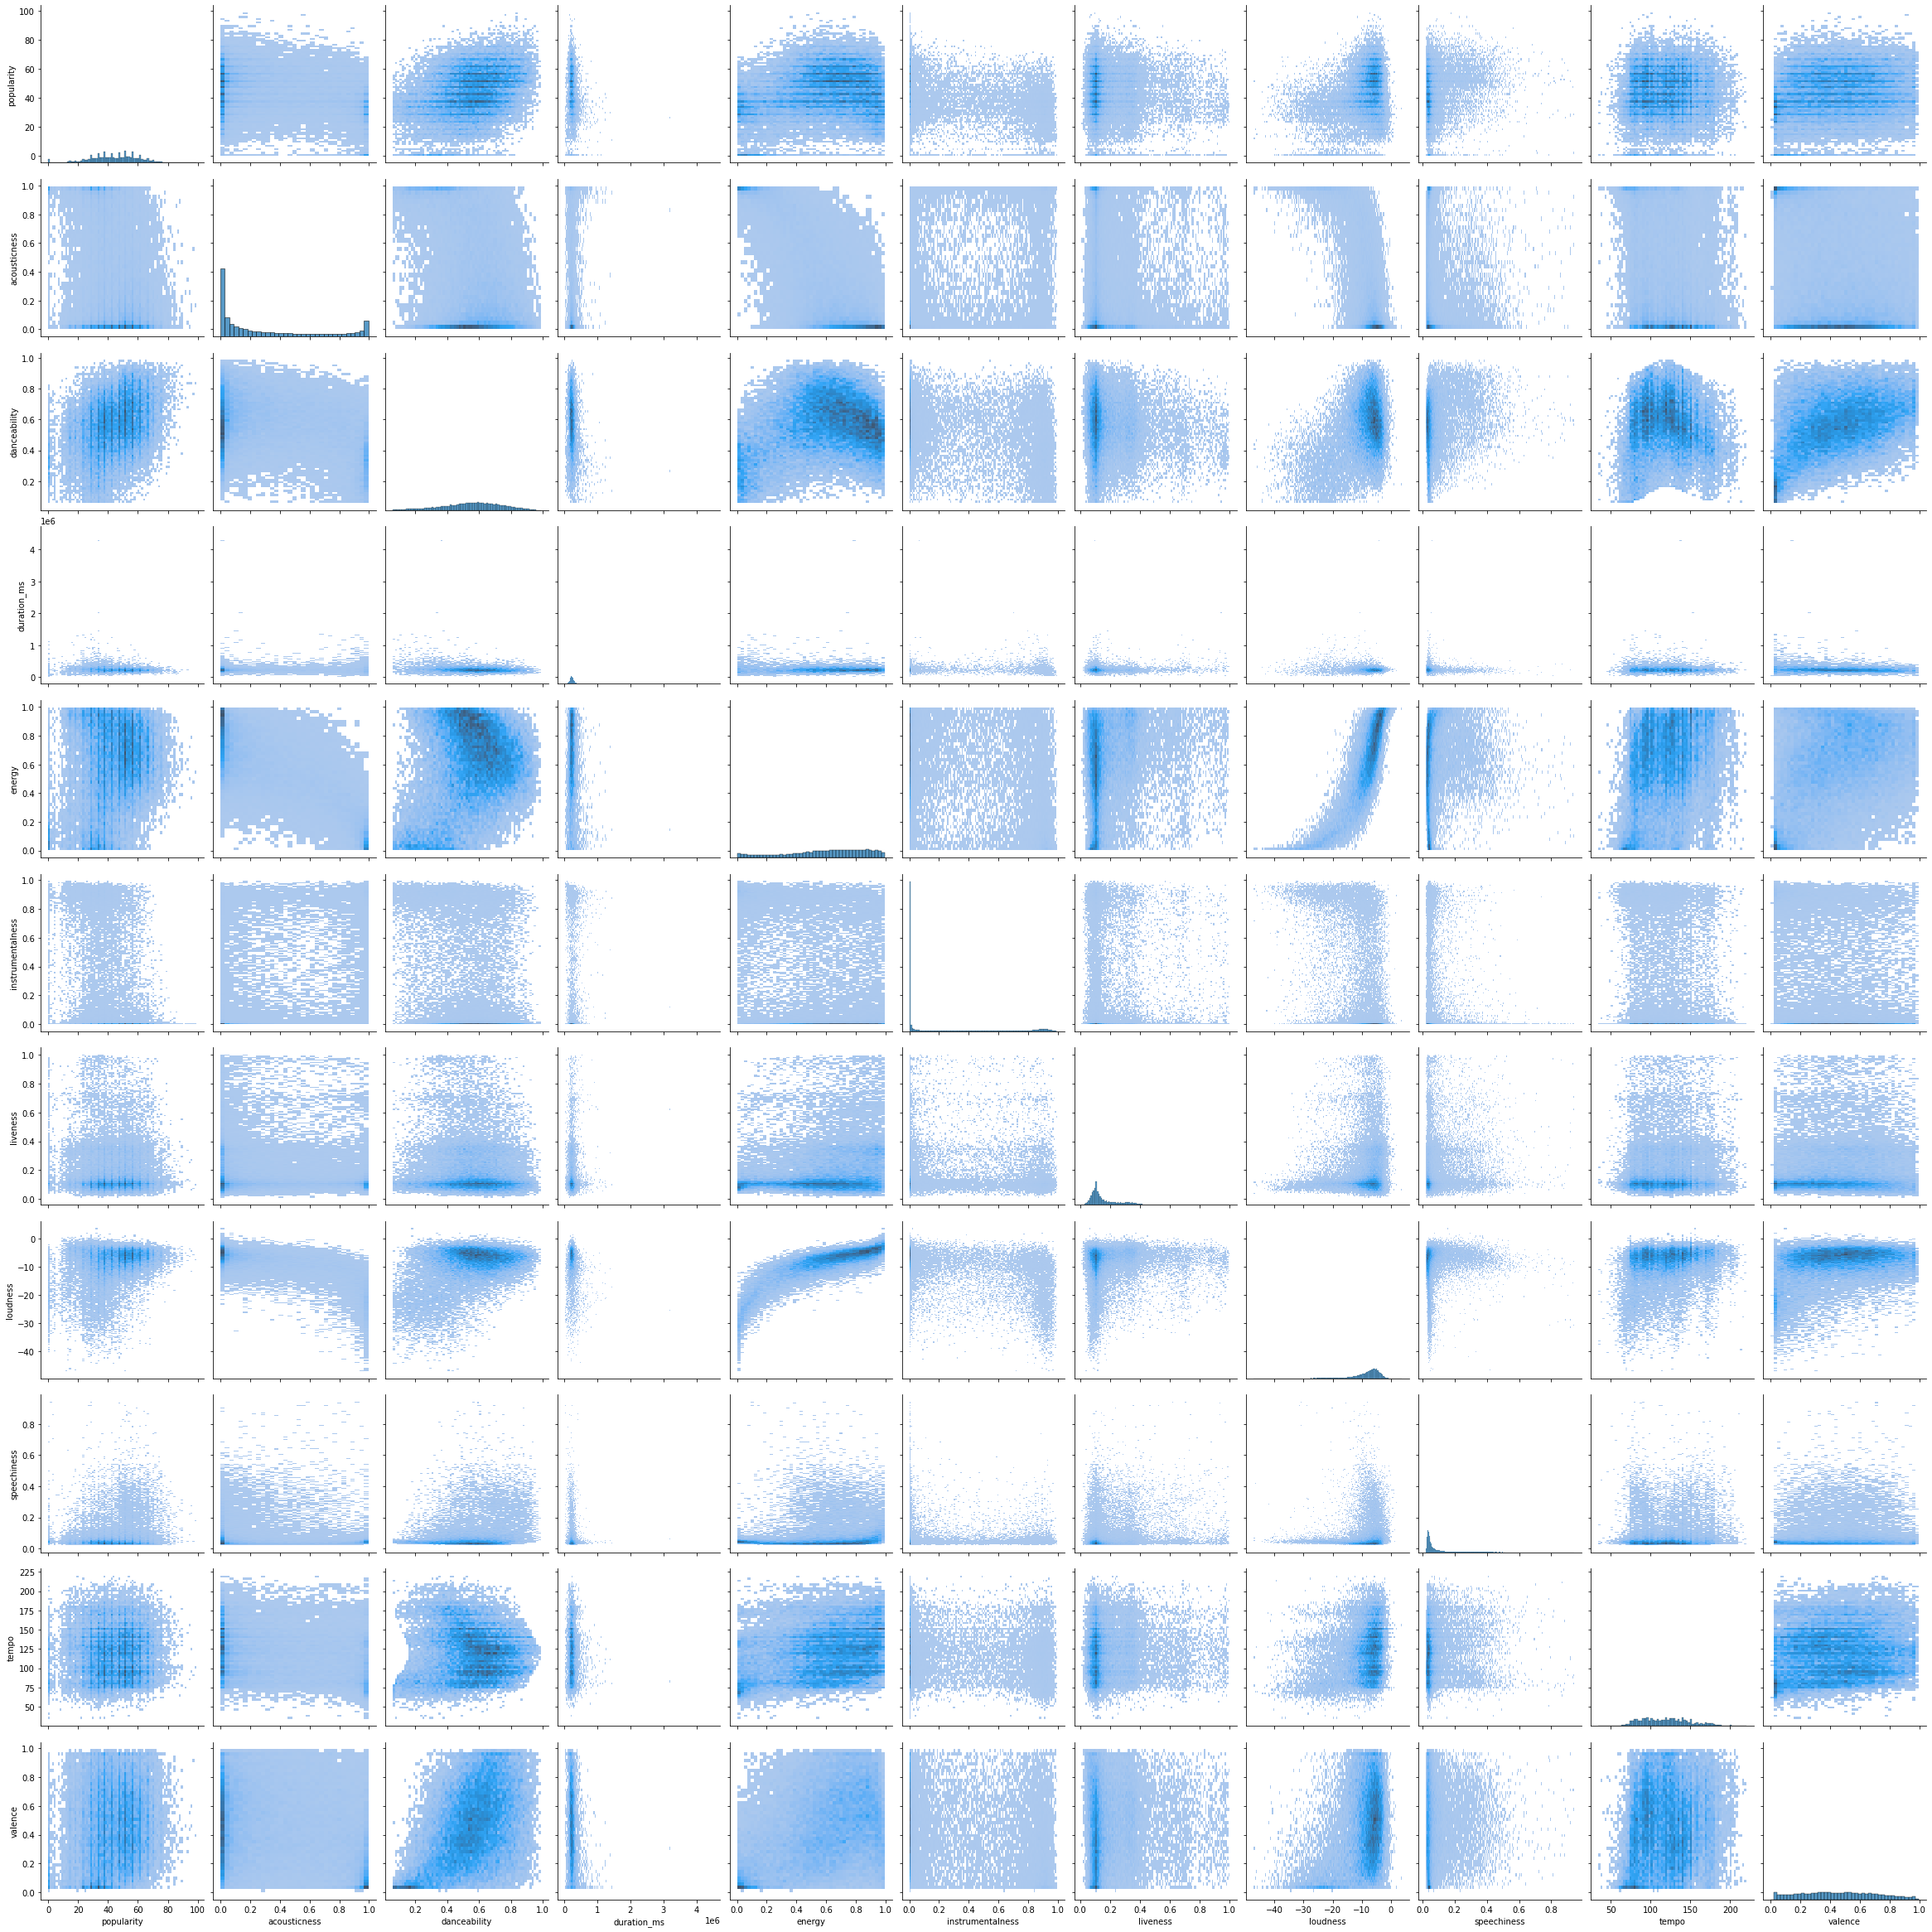

In [3]:
# Plot numerical features relationships pairwise
sns.pairplot(df, kind='hist', height=3, palette='#FFA500');

**Popularity:**
* Louder songs seem to be more popular.
* More danceable tracks seems to be more popular.
* Less acoustic tracks seems to be more popular.
* Popular tracks seem to have average energy compared to less popular (not too low, not too high).
* Live recordings seem to be less popular.

**Acousticness:**
* More acoustic songs seem to be slightly less danceable, energetic, and loud.

**Danceability:** see popularity.

**Track duration** doesn't seem to affect other features significantly.

**Energy:** see popularity, loudness, acousticness.
* Energetic songs seem to have higher valence, tempo, and danceability.

**Instrumentalness:** doesn't seem to affect other features significantly.

**Liveness:**
* Live recordings seem to be less danceable.

**Loudness:**
* Louder tracks seem to be more danceable, energetic, have higher tempo, valence, and more vocals/speech.
* Louder tracks seem more likely to be live recordings.

**Speechiness:** doesn't seem to affect other features significantly.

**Tempo:** seems to be almost uniformly distributed over danceability.

**Valence:** doesn't seem to affect other features significantly.

## Music genre popularity

In [4]:
# How many instances of each genre there are in the dataset after the cleanup
df.music_genre.value_counts()

Rock           4099
Hip-Hop        4077
Anime          4064
Jazz           4064
Alternative    4051
Country        4049
Blues          4046
Rap            4042
Classical      4036
Electronic     4031
Name: music_genre, dtype: int64

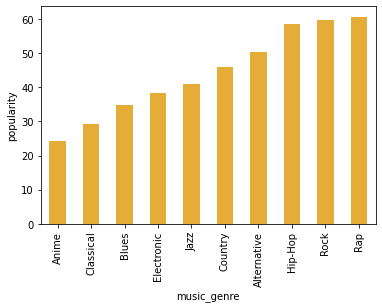

In [5]:
# Sort genres by average popularity
sorted_pop = df.groupby('music_genre')['popularity'].mean().sort_values()
sorted_pop.plot(kind='bar', ylabel='popularity', sort_columns=True, color='#e6ac38');

The most popular genre on average: **Rap**, with Rock and Hip-Hop being close to it.  
The least popular genre on average: **Anime**.

## Key relationship with music genre

In [6]:
# Key distribution across music genres
crosstab_df = pd.crosstab(df.key, df.music_genre)
crosstab_df1 = crosstab_df.copy()

for col in crosstab_df1:
    crosstab_df1['Total'] = crosstab_df.sum(axis=1)
crosstab_df1    
#crosstab_df1.sort_values(by='Total')

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock,Total
key,,,,,,,,,,,
A,390,390,540,386,437,338,312,362,312,480,3947
A#,221,231,187,273,211,324,341,403,329,201,2721
B,359,305,273,198,282,381,359,240,367,310,3074
C,439,487,522,491,445,376,360,479,356,512,4467
C#,421,384,244,335,307,576,769,362,723,324,4445
D,429,427,551,493,481,341,319,343,337,523,4244
D#,121,141,93,248,155,85,74,159,113,114,1303
E,314,310,319,338,371,267,231,271,224,385,3030
F,339,385,357,363,292,346,307,503,305,289,3486


**A** key is mostly used in Blues  
**A#** key is mostly used in Jazz  
**B** key is mostly used in Electronic  
**C** key is mostly used in Blues  
**C#** key is mostly used in Hip-Hop  
**D** key is mostly used in Blues  
**D#** key is mostly used in Classical  
**E** key is mostly used in Rock  
**F** key is mostly used in Jazz  
**F#** key is mostly used in Alternative  
**G** key is mostly used in Blues  
**G#** key is mostly used in Hip-Hop  

We can also see that **G** key is the most represented in the dataset and **D#** key is the least represented.

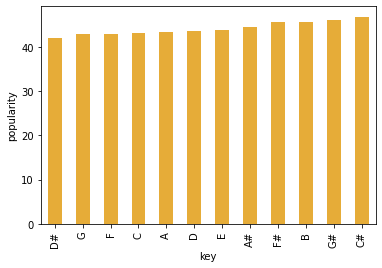

In [7]:
# Sort keys by average popularity
sorted_pop = df.groupby('key')['popularity'].mean().sort_values()
sorted_pop.plot(kind='bar', ylabel='popularity', sort_columns=True, color='#e6ac38');

The most popular key on average is **C#**  
The least popular key on average **D#**  
Although keys don't seem to influence popularity too much.  

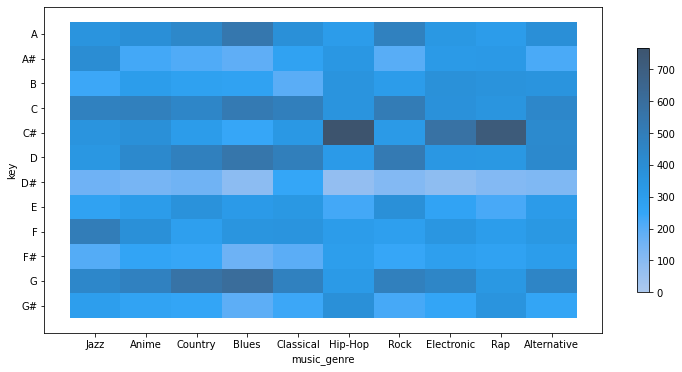

In [8]:
# Heatmap for key distribution across music genres
df1 = df.copy()
df1 = df1.sort_values(by='key')

plt.figure(figsize=(12.5,6))
sns.histplot(x='music_genre', y='key', data=df1, cbar=True, cbar_kws=dict(shrink=.75));

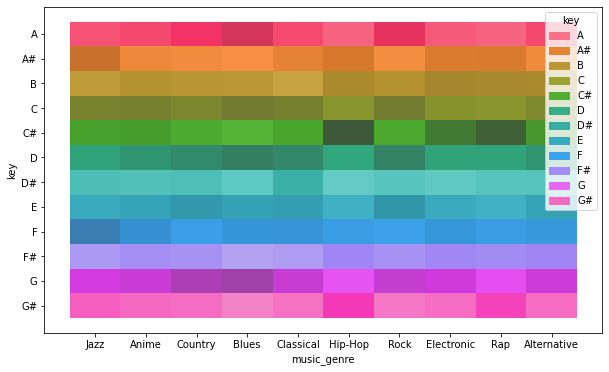

In [9]:
# Multicolored heatmap for key distribution across music genres
plt.figure(figsize=(10,6))
sns.histplot(x='music_genre', y='key', data=df1, hue=df1['key']);

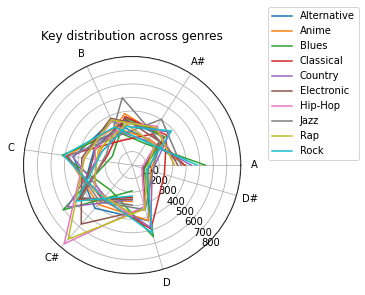

In [10]:
# Polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# ax = sns.histplot(x='music_genre', y='key', data=df1)

ax.plot(crosstab_df, label=crosstab_df.columns)

ax.legend()
ax.set_rlabel_position(-50)
ax.grid(True)
ax.set_title("Key distribution across genres", va='bottom')

angle = np.deg2rad(0)
ax.legend(loc="lower left",
          bbox_to_anchor=(.6 + np.cos(angle)/2, .5 + np.sin(angle)/2))

plt.show();

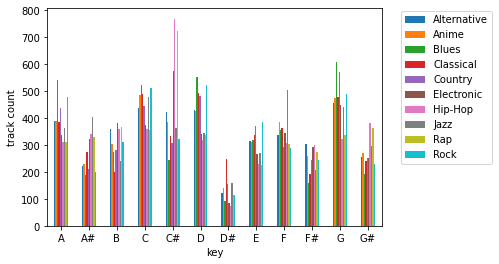

In [11]:
# Barplot for key distribution across music genres
ax = crosstab_df.plot(kind='bar', ylabel='track count', sort_columns=True)
plt.xticks(rotation=0)
angle = np.deg2rad(-10)
ax.legend(loc="lower left",
          bbox_to_anchor=(.55 + np.cos(angle)/2, .35 + np.sin(angle)/2));

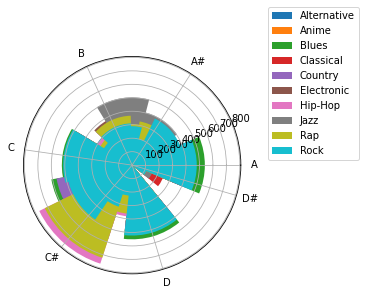

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for col in crosstab_df.columns:   
    ax.bar(crosstab_df.index, crosstab_df[col],
           label=col)
#ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
plt.legend(crosstab_df.columns)

angle = np.deg2rad(0)
ax.legend(loc="lower left",
          bbox_to_anchor=(.6 + np.cos(angle)/2, .5 + np.sin(angle)/2))

plt.show();

## Mode relationship with music genre

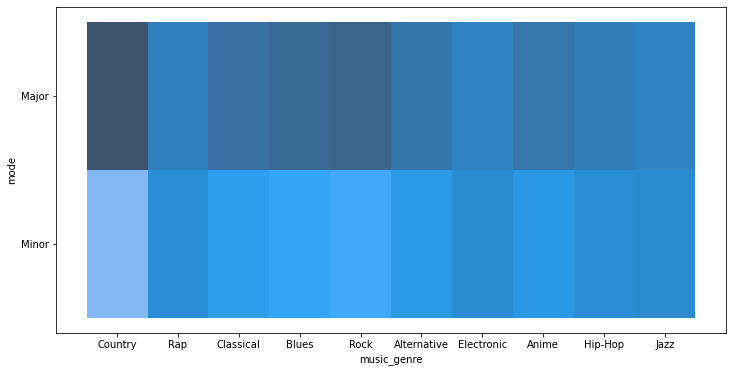

In [13]:
# How mode affects the music genre
plt.figure(figsize=(12,6))
df1 = df1.sort_values(by='mode')
sns.histplot(x='music_genre', y='mode', data=df1);

Major mode is mostly found in **Country** genre.  
Minor mode is mostly found in **Jazz** genre.

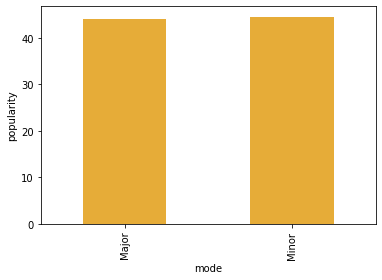

In [14]:
# Sort mode by average popularity
sorted_pop = df.groupby('mode')['popularity'].mean().sort_values()
sorted_pop.plot(kind='bar', ylabel='popularity', sort_columns=True, color='#e6ac38');

Both modes seem to be almost equally popular.